In [1]:
import tensorflow as tf
import import_ipynb
from matplotlib import pyplot as plt
from data_process_demo import *
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input

stock(105.AAPL) k data exists


In [2]:
tf.random.set_seed(dp.seed)
x_train_data_set, y_train_data_set, x_test_data_set, y_test_data_set = dp.data_set()

In [3]:
model = tf.keras.Sequential([
    Input(shape=(dp.window_step, 2)),
    LSTM(units=dp.window_step * 10, activation='tanh', return_sequences=True),
    Dropout(rate=0.2),
    LSTM(units=dp.window_step * 15, activation='tanh', return_sequences=False),
    Dropout(rate=0.2),
    Dense(units=1)
], name="LSTM-Stock")
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=optimizer)
# 输出模型规
model.summary()

2025-02-12 23:21:10.454671: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-02-12 23:21:10.454718: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-02-12 23:21:10.454740: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1739373670.455209 1033716 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1739373670.455636 1033716 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "LSTM-Stock"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 14, 140)        │        80,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 140)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 210)            │       294,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 210)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           211 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 375,131 (1.43 MB)

 Trainable params: 375,131 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 训练模型
history = model.fit(
    x_train_data_set, y_train_data_set, batch_size=64, epochs=50,
    validation_data=(x_test_data_set, y_test_data_set), validation_freq=1
)
loss = history.history['loss']
acc = history.history['val_loss']

Epoch 1/50


2025-02-12 23:21:24.297191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.1307 - val_loss: 0.1281
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0160 - val_loss: 0.0022
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0065 - val_loss: 0.0143
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0016 - val_

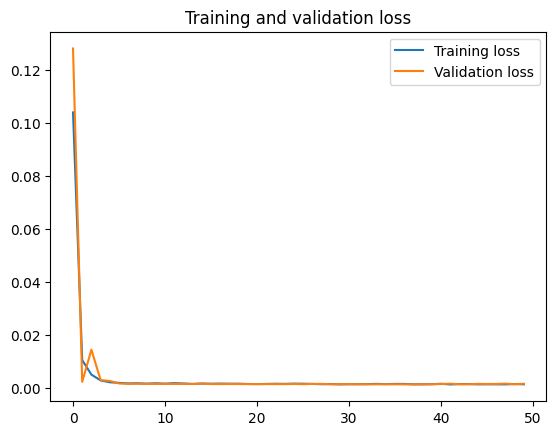

In [5]:
plt.plot(loss, label='Training loss')
plt.plot(acc, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


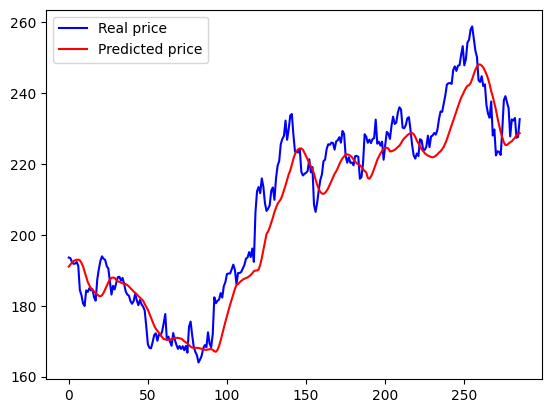

In [6]:
plt.close()
predict_price = model.predict(x_test_data_set)
# print(predict_price)
predict_price = dp.close_sc.inverse_transform(predict_price)
real_price = dp.close_sc.inverse_transform(dp.test_split[0][dp.window_step:])
# print(real_price_shape)
# real_price = [i[0] for i in real_price_shape]
plt.plot(real_price, label='Real price', color='blue')
plt.plot(predict_price, label='Predicted price', color='red')
plt.legend()
plt.show()